##**Tasks 2: Exploratory Data Analysis (EDA)**

Overview of the project:

This EDA examines customer churn patterns in a telecommunications company dataset containing 7,043 customer records with 21 features including demographics, services subscribed, account information, and churn status.


**1 Loading the data**

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/Telco_Customer_Churn_Dataset .csv')

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**2 Importing the libraries**

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

# Import specific visualization components if needed
from matplotlib.ticker import PercentFormatter

**3 Finding Overall Churn Rate**

Churn
No    73.46
Yes   26.54
Name: proportion, dtype: float64


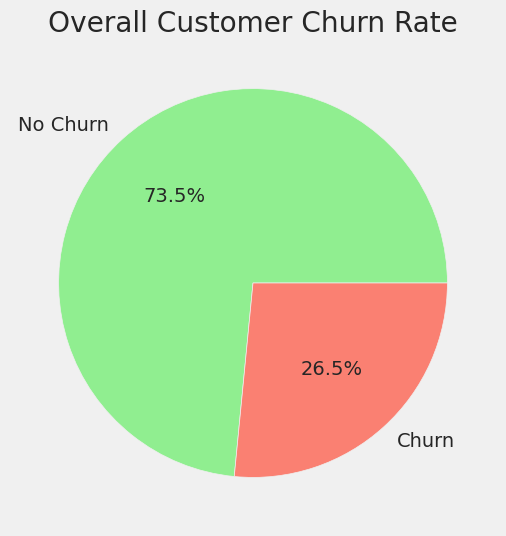

In [5]:
# Calculate churn rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

# Visualize churn rate
plt.figure(figsize=(6,6))
plt.pie(churn_rate, labels=['No Churn', 'Churn'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Overall Customer Churn Rate')
plt.show()

**Customer Demographics Analysis**

Gender Distribution

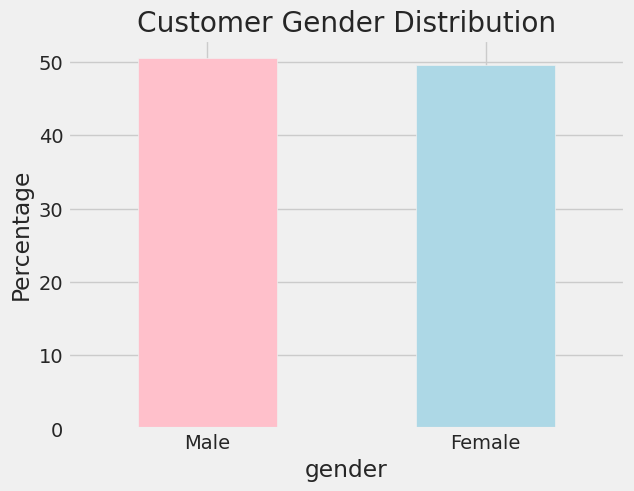

In [6]:
gender_dist = df['gender'].value_counts(normalize=True) * 100
gender_dist.plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Customer Gender Distribution')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

Findings:

Nearly equal gender distribution (50.5% male, 49.5% female)

**Senior Citizen Status**

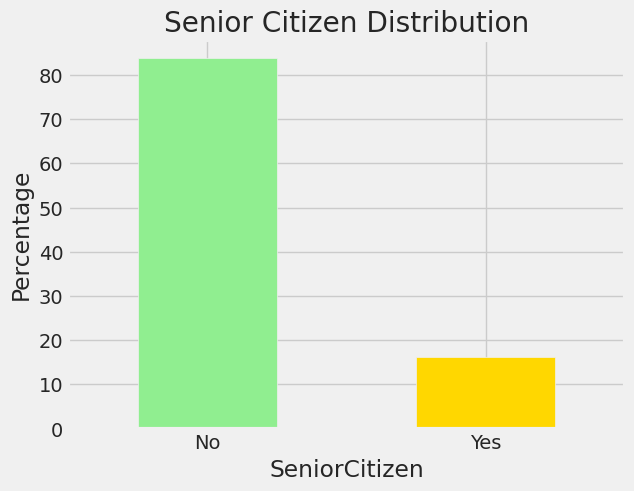

In [7]:
senior_dist = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'}).value_counts(normalize=True) * 100
senior_dist.plot(kind='bar', color=['lightgreen', 'gold'])
plt.title('Senior Citizen Distribution')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

Findings:

Only 16.2% of customers are senior citizens

83.8% are non-senior customers

**Findings:

Only 16.2% of customers are senior citizens

83.8% are non-senior customers**

**Partner and Dependents Status**

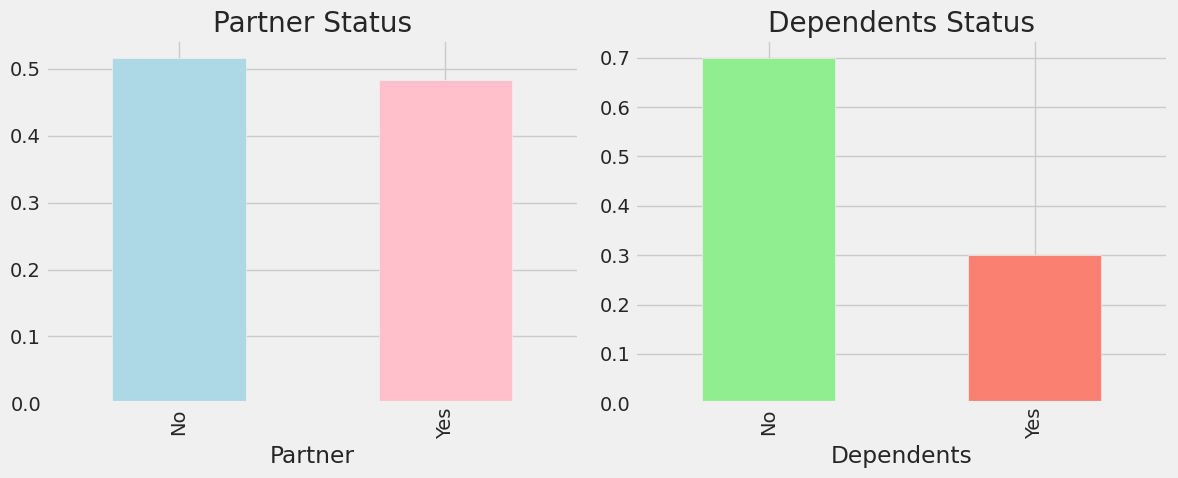

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
df['Partner'].value_counts(normalize=True).plot(kind='bar', ax=ax1, color=['lightblue', 'pink'])
df['Dependents'].value_counts(normalize=True).plot(kind='bar', ax=ax2, color=['lightgreen', 'salmon'])
ax1.set_title('Partner Status')
ax2.set_title('Dependents Status')
plt.tight_layout()
plt.show()

Findings:

48.3% have partners, 51.7% don't

Only 30% have dependents, 70% don't

**4 Tenure Analysis**

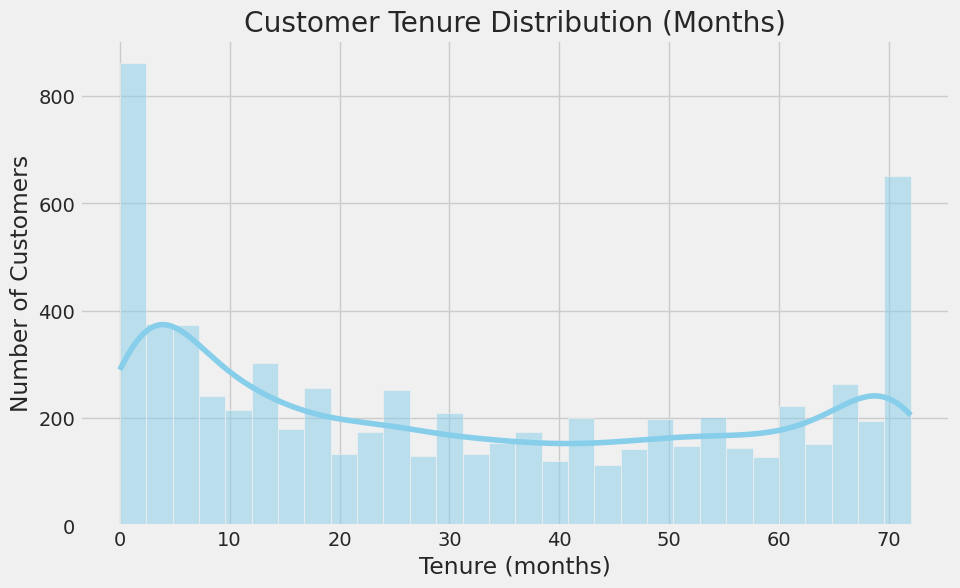

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['tenure'], bins=30, kde=True, color='skyblue')
plt.title('Customer Tenure Distribution (Months)')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

Findings:

Bimodal distribution with peaks at:

New customers (0-5 months tenure)

Long-term customers (60-72 months tenure)

Many customers churn early in their lifecycle

**5 Contract Type Analysis**

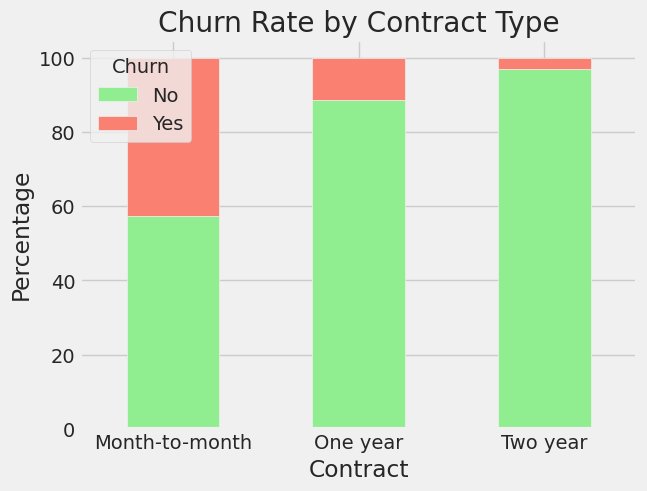

In [10]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Churn Rate by Contract Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

Findings:

Month-to-month contracts have highest churn rate

Two-year contracts have lowest churn rate

One-year contracts are in between

**6 Payment Method Analysis**

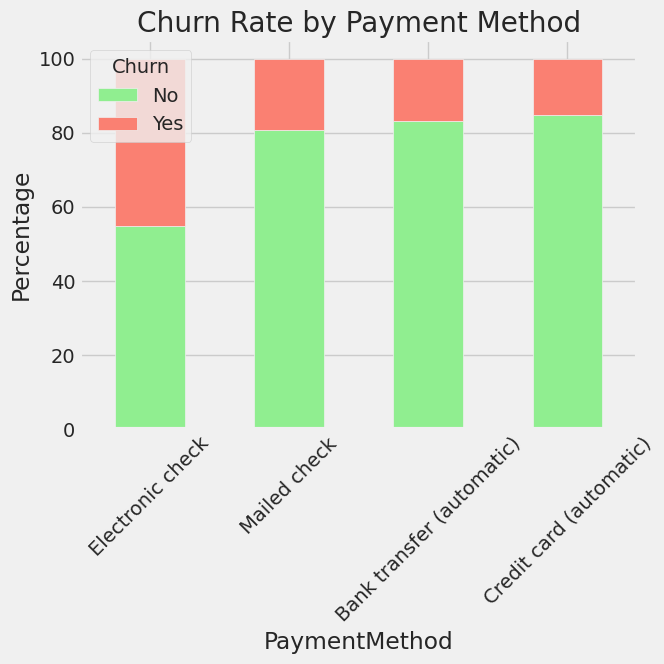

In [11]:
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
payment_churn.sort_values('Yes', ascending=False).plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Churn Rate by Payment Method')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

Electronic check has highest churn rate

Automatic payment methods have much lower churn:

Bank transfer

Credit card

Mailed check

**7 Monthly Charges vs. Churn**

/tmp/ipython-input-12-3366545001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=['lightgreen', 'salmon'])


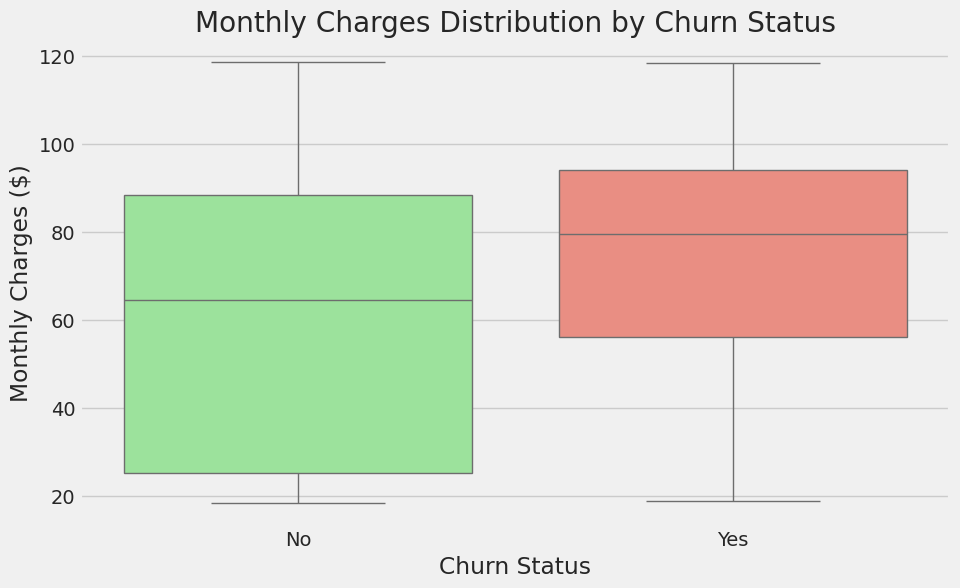

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette=['lightgreen', 'salmon'])
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges ($)')
plt.show()

Findings:

Customers who churn have higher median monthly charges

Wider distribution among churned customers suggests pricing sensitivity

**8 Internet Service Analysis**

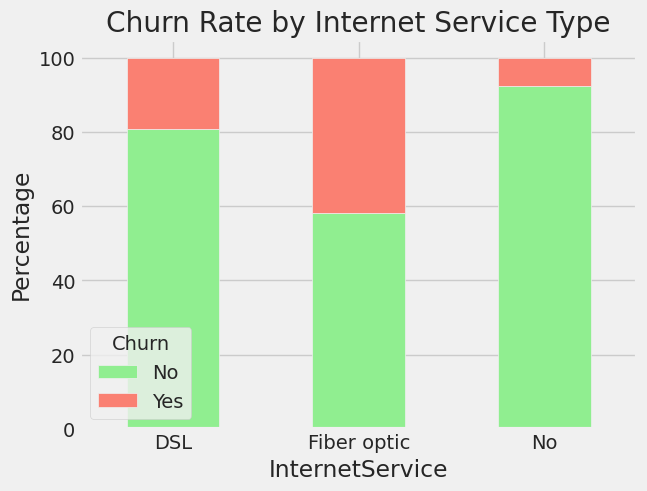

In [13]:
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
internet_churn.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

Findings:

Fiber optic customers have highest churn rate (41.9%)

DSL customers churn at 19.2%

Customers with no internet service rarely churn (7.6%)

**Key Insights**

High-Risk Groups:

-Month-to-month contract customers (42.7% churn)

-Electronic check payment users (45.3% churn)

-Fiber optic internet subscribers (41.9% churn)

-Higher monthly charge customers

Protective Factors:

-Long-term contracts (especially 2-year) reduce churn

-Automatic payment methods reduce churn

-Having dependents reduces churn likelihood